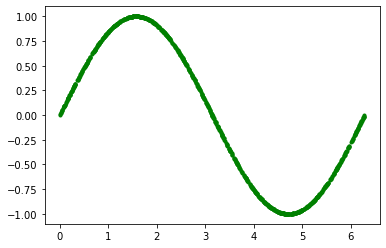

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
# 데이터 샘플 생성
SAMPLE = 1000

# 쥬피터 노트북에서 실행할 때 마다 시드값을 지정해서 다른 랜덤값을 얻는다.
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

#사인 파의 전폭 범위를 0 ~ 2n 내에서 균일하게 난수 집합을 생성
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLE)
# 값을 섞습니다. 순서를 따르지 않게 하기
np.random.shuffle(x_values)

# 사인값을 계산합니다.
y_values = np.sin(x_values)

# 데이터를 그려줍니다,
plt.plot(x_values, y_values, 'g.')
plt.show()

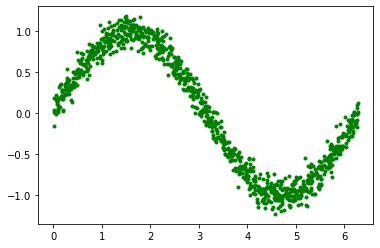

In [2]:
y_values = np.sin(x_values)
y_values += 0.1 * np.random.randn(*y_values.shape)


# 데이터를 그려줍니다,
plt.plot(x_values, y_values, 'g.')
plt.show()

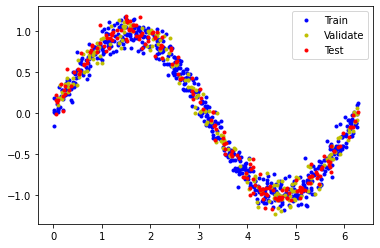

In [3]:
# 데이터 분할
# 훈련, 검증, 테스트
# 6  :    2   : 2
# 훈련 60%, 검증 20%, 테스트 20%
train_split = int(0.6 *  SAMPLE)
test_split = int(0.2 * SAMPLE + train_split)

# np.split() : 두번째 인수가 중요한데, 분할되는 인덱스 배열이며 두개의 인덱스를 제공하고 
# 있기 때문에 총 3개의 덩어리로 나뉘어 집니다.
x_train, x_validate, x_test = np.split(x_values, [train_split, test_split])
y_train, y_validate, y_test = np.split(y_values, [train_split, test_split])

# 분할한 데이터 원 데이터와 크기가 같은지 확인
assert(x_train.size + x_validate.size + x_test.size) == SAMPLE

# 다른 색상으로 분할된 데이터를 그래프에 표시합니다.
plt.plot(x_train, y_train, 'b.', label='Train')
plt.plot(x_validate, y_validate, 'y.', label='Validate')
plt.plot(x_test, y_test, 'r.', label='Test')
plt.legend()
plt.show()

In [9]:
# 케라스
import tensorflow as tf
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()

# 'relu'를 통해서 값을 전달합니다.
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))
# 마지막 레이어 뉴런 1개
model_1.add(layers.Dense(1))

model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model_1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'r,', label='validate loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined